In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv('ab_edited.csv')


In [2]:
data.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


,user_id,timestamp,group,landing_page,converted,date
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,2017-01-19
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,2017-01-04
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,2017-01-15


In [16]:
print('treatment sample size :', len(data_treatment))

treatment sample size : 145311


control sample size : 145274
   user_id                   timestamp    group landing_page  converted
0   851104  2017-01-21 22:11:48.556739  control     old_page          0
1   804228  2017-01-12 08:01:45.159739  control     old_page          0
4   864975  2017-01-21 01:52:26.210827  control     old_page          1
5   936923  2017-01-10 15:20:49.083499  control     old_page          0
7   719014  2017-01-17 01:48:29.539573  control     old_page          0


In [7]:
print('test proportion :', data.converted.mean())

test proportion : 0.11959667567149027


In [8]:
print('treatment sign_up_rate :', data_treatment.converted.mean())

treatment sign_up_rate : 0.11880724790277405


In [9]:
print('control sign_up rate :', data_control.converted.mean())

control sign_up rate : 0.1203863045004612


In [10]:
#creating a column named date with unique dates
data['date'] = pd.DatetimeIndex(data['timestamp']).date
print(data.head())
print(data.info())

   user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

         date  
0  2017-01-21  
1  2017-01-12  
2  2017-01-11  
3  2017-01-08  
4  2017-01-21  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 6 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
date            290585 non-null object
dtypes: int64(2), object(4)
memory usage: 13.3+ MB
None


In [17]:
data_treatment = data[(data.group == 'treatment')]
data_treatment.head()

,user_id,timestamp,group,landing_page,converted,date
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,2017-01-19
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,2017-01-04
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,2017-01-15


In [11]:
stats.ttest_ind(data_treatment.converted ==1, data_control.converted ==1)

Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

In [18]:
data_control = data[(data.group == 'control')]
print('control sample size :', len(data_control))
print(data_control.head())

control sample size : 145274
   user_id                   timestamp    group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739  control     old_page          0   
1   804228  2017-01-12 08:01:45.159739  control     old_page          0   
4   864975  2017-01-21 01:52:26.210827  control     old_page          1   
5   936923  2017-01-10 15:20:49.083499  control     old_page          0   
7   719014  2017-01-17 01:48:29.539573  control     old_page          0   

         date  
0  2017-01-21  
1  2017-01-12  
4  2017-01-21  
5  2017-01-10  
7  2017-01-17  


In [12]:
#it appears that there is a significant difference between control and treatment groups

In [13]:
data_converted = list(np.array(data[data.converted == 1]))
len(data_converted)

34753

Text(0.5, 1.0, 'Comparing conversion rates by date')

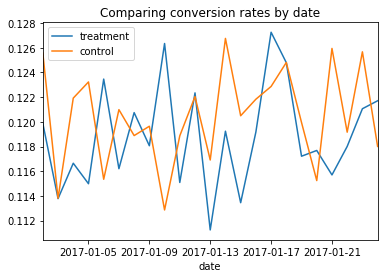

In [19]:
fig = data_treatment[['date', 'converted']].groupby('date').mean().plot()
data_control[['date', 'converted']].groupby('date').mean().plot(ax = fig)
plt.legend(['treatment', 'control'])
plt.title('Comparing conversion rates by date')

In [ ]:
print("T-TEST results by Date")
for day in data.date.unique():
    date_day = data[data.date == day]
    print(stats.ttest_ind(data[data.group == 'treatment'].converted, data[data.group == 'control'].converted))

In [ ]:
##After grouping the data with date and running a t-test, it appears that there is significant difference between 
## treatment and control groups
